<a href="https://colab.research.google.com/github/bdi2357/iShares_ETF_holdings_downloader/blob/main/ishares_holdings_downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os,sys,re
import requests
import urllib

In [ ]:
etfs_ishares = pd.read_html("https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts&showAll=true")

In [ ]:
etfs_ishares[0].shape

(393, 10)

In [ ]:
etfs_list = etfs_ishares[0]
etfs_list.head()

,Ticker,Name,12m Trailing Yield (%),As of,YTD Return (%),As of.1,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD)
0,IGLB,iShares 10+ Year Investment Grade Corporate Bo...,4.18,"Aug 30, 2022",-22.24,"Aug 30, 2022","Dec 08, 2009",0.06,0.06,1385865695
1,ILTB,iShares Core 10+ Year USD Bond ETF,3.99,"Aug 30, 2022",-22.37,"Aug 30, 2022","Dec 08, 2009",0.06,0.06,304482155
2,QLTA,iShares Aaa - A Rated Corporate Bond ETF,2.41,"Aug 30, 2022",-13.18,"Aug 30, 2022","Feb 14, 2012",0.15,0.15,1011262904
3,DVYA,iShares Asia/Pacific Dividend ETF,7.30,"Jul 31, 2022",-6.16,"Jul 31, 2022","Feb 23, 2012",0.49,0.49,33611015
4,STIP,iShares 0-5 Year TIPS Bond ETF,6.10,"Aug 30, 2022",-1.14,"Aug 30, 2022","Dec 01, 2010",0.03,0.03,12673720770


In [ ]:
import dateutil

In [ ]:
from dateutil.parser import parse as parse_dt
def parse_dm(x):
    if x>9:
        return str(x)
    else:
        return "0"+str(x)
def date2fmt(dt):
    prsd = parse_dt(dt)
    return str(prsd.year)+"-"+parse_dm(prsd.month)+"-"+parse_dm(prsd.day)

In [ ]:
etfs_list["dt_parsed"] = etfs_list.apply(lambda r: date2fmt(r["Incept. Date"]),axis=1)

In [ ]:
etfs_list = etfs_list.sort_values(by = "dt_parsed")

In [ ]:
def find_etf_url(ticker,big_s):
    return re.findall("\".*?\"",re.findall("<a href=\".*?\">%s"%ticker,big_s)[0])[0][1:-1]

In [ ]:
ishares_etf_page = requests.get("https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts&showAll=true")

In [ ]:
ishares_urls = ishares_etf_page.text

In [ ]:
def find_etf_url(ticker,big_s):
    return re.findall("\".*?\"",re.findall("<a href=\".*?\">%s"%ticker,big_s)[0])[0][1:-1]

In [ ]:
etfs_list["url_add"] = etfs_list.apply(lambda r: find_etf_url(r["Ticker"],ishares_urls),axis=1)

In [ ]:
USER_AGENT_LIST = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
        'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
        'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
        'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
        'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
    ]

In [ ]:
def response2df(txt):
    if txt.find("Ticker") != -1:
        L = txt[txt.find("Ticker"):].split("\n")
        columns=L[0].split(",")
        #print(L[:3])
        data = [[x[1:-1] for x in re.findall("\".*?\"",row)] for row in L[1:]]
        #print("H1")
        df = pd.DataFrame(data=data,columns = columns)
        #print("H2")
        df = df[df.apply(lambda r: isinstance(r["Ticker"],str) and re.findall("[A-Z0-9]*",r["Ticker"])[0] == r["Ticker"],axis=1)]
        #print("H3")
        return df
    elif  txt.find("Duration") != -1:
        print("HRER")
        L = txt[txt.find("Name"):].split("\n")
        columns=L[0].split(",")
        #print(columns)
        #print(L[:3])
        data = [[x[1:-1] for x in re.findall("\".*?\"",row)] for row in L[1:]]
        #print("H1")
        
        df = pd.DataFrame(data=data,columns = columns)
        print("HRER2")
        #print("H2")
        #df = df[df.apply(lambda r: isinstance(r["Ticker"],str) and re.findall("[A-Z0-9]*",r["Ticker"])[0] == r["Ticker"],axis=1)]
        #print("H3")
        return df
        

In [ ]:
import random
def etf_holdings2(ticker,date,out_dir):
    url_base = "https://www.ishares.com%s/1467271812596.ajax?fileType=csv&fileName=%s_holdings&dataType=fund&asOfDate=%s"
    product_url = etfs_list.loc[etfs_list['Ticker'] == ticker, "url_add"].iloc[0] #etfs_list["url_add"]
    url = url_base%(product_url,ticker,date)
    
    
    headers = random.choice(USER_AGENT_LIST)
    opener = urllib.request.build_opener()
    opener.addheaders = [("User-Agent",headers)]
    urllib.request.install_opener(opener)
    #req = requests.get(url, headers=headers)
    tar_file = os.path.join(out_dir,'%s_holdings_%s.csv'%(ticker,date))
    return urllib.request.urlretrieve(url,tar_file ),tar_file


In [ ]:
"""
The rebalancing reference date is the second Friday of March, June, September, 
and December.
"""

'\nThe rebalancing reference date is the second Friday of March, June, September, \nand December.\n'

In [ ]:
import calendar
import pandas_market_calendars as mcal
def last_business_day_in_month(year: int, month: int) -> int:
    return max(calendar.monthcalendar(year, month)[-1:][0][:5])

for year in range(2011,2012):
    for month in [3,6,9,12]:
        print(last_business_day_in_month(year,month))

def mnth(m):
    if m<10:
        return '0'+str(m)
    else:
        return str(m)
def first_trading_day_after_21_in_month(year: int, month: int, frm = 22) -> int:
    nyse = mcal.get_calendar('NYSE')
    start_date = '%s-%s-%s'%(str(year),mnth(month),str(frm))
    end_date = '%s-%s-29'%(str(year),mnth(month))
    
    #print(nyse.valid_days(start_date = start_date, end_date = end_date)[-1])
    return nyse.valid_days(start_date = start_date, end_date = end_date)[-1].date().day
    
first_trading_day_after_21_in_month(2012,4)   

31
30
30
30


27

In [ ]:
import time
from datetime import datetime as dttm
ticker = "IWM"
home_dir = "."
def mnth(m):
    if m<10:
        return '0'+str(m)
    else:
        return str(m)
def download_holdings_from_2011(ticker,home_dir):
    tar_dir = os.path.join(home_dir,ticker)
    if not os.path.isdir(tar_dir):
        os.mkdir(tar_dir)
    cur_year = dttm.now().year
    cur_month = dttm.now().month
    inception_dt = etfs_list.loc[etfs_list['Ticker'] == ticker, "dt_parsed"].iloc[0]
    
    start_year =  max(2011,int(inception_dt.split("-")[0]))
    for year in range(start_year,cur_year+1):
        for month in [3,6,9,12]:
            time.sleep(2)
            #print(year,month)
            day = last_business_day_in_month(year,month)#first_trading_day_after_21_in_month(year,month)
            dt = str(year)+mnth(month)+str(day)
            if (year < cur_year or month < cur_month) and not (year == start_year and month <= int(inception_dt.split("-")[1])):
                f_path = etf_holdings2(ticker,dt,tar_dir)[1]
                flg = True
                frm = 22
                while frm < 28 and test_is_valid_holding_file(f_path) != "Success":
                    os.system("rm %s"%f_path)
                    
                    day = first_trading_day_after_21_in_month(year,month)
                    dt = str(year)+mnth(month)+str(day)
                    frm+=1

                    
                
        

In [ ]:
from pathlib import Path
home = str(Path.home())
tar_path = os.path.join(home,"iSharesHoldings")
if not os.path.isdir(tar_path):
    os.mkdir(tar_path)

In [ ]:
etfs_list["Net Assets (USD)"] = etfs_list["Net Assets (USD)"].astype(float)

In [ ]:
etfs_list = etfs_list.sort_values(by="Net Assets (USD)",ascending=False)
etfs_list[:30]

,Ticker,Name,12m Trailing Yield (%),As of,YTD Return (%),As of.1,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),dt_parsed,url_add
171,IVV,iShares Core S&P 500 ETF,1.44,"Jul 31, 2022",-16.16,"Jul 31, 2022","May 15, 2000",0.03,0.03,2.959908e+11,2000-05-15,/us/products/239726/ishares-core-sp-500-etf
219,IEFA,iShares Core MSCI EAFE ETF,4.39,"Jul 31, 2022",-20.37,"Jul 31, 2022","Oct 18, 2012",0.07,0.07,8.363668e+10,2012-10-18,/us/products/244049/ishares-core-msci-eafe-etf
12,AGG,iShares Core U.S. Aggregate Bond ETF,2.02,"Aug 30, 2022",-10.65,"Aug 30, 2022","Sep 22, 2003",0.04,0.03,8.222734e+10,2003-09-22,/us/products/239458/ishares-core-total-us-bond...
210,IJR,iShares Core S&P Small-Cap ETF,1.68,"Jul 31, 2022",-14.79,"Jul 31, 2022","May 22, 2000",0.06,0.06,6.572527e+10,2000-05-22,/us/products/239774/ishares-core-sp-smallcap-etf
220,IEMG,iShares Core MSCI Emerging Markets ETF,4.02,"Jul 31, 2022",-17.67,"Jul 31, 2022","Oct 18, 2012",0.09,0.09,6.522709e+10,2012-10-18,/us/products/244050/ishares-core-msci-emerging...
152,IWF,iShares Russell 1000 Growth ETF,0.67,"Jul 31, 2022",-23.28,"Jul 31, 2022","May 22, 2000",0.18,0.18,6.121817e+10,2000-05-22,/us/products/239706/ishares-russell-1000-growt...
199,IJH,iShares Core S&P Mid-Cap ETF,1.43,"Jul 31, 2022",-13.59,"Jul 31, 2022","May 22, 2000",0.05,0.05,6.099626e+10,2000-05-22,/us/products/239763/ishares-core-sp-midcap-etf
156,IWM,iShares Russell 2000 ETF,1.20,"Jul 31, 2022",-17.20,"Jul 31, 2022","May 22, 2000",0.19,0.19,5.255350e+10,2000-05-22,/us/products/239710/ishares-russell-2000-etf
154,IWD,iShares Russell 1000 Value ETF,1.86,"Jul 31, 2022",-9.97,"Jul 31, 2022","May 22, 2000",0.18,0.18,5.150558e+10,2000-05-22,/us/products/239708/ishares-russell-1000-value...
95,EFA,iShares MSCI EAFE ETF,4.59,"Jul 31, 2022",-19.91,"Jul 31, 2022","Aug 14, 2001",0.32,0.32,4.379824e+10,2001-08-14,/us/products/239623/ishares-msci-eafe-etf


In [ ]:
from datetime import datetime as dttm

In [ ]:
def test_is_valid_holding_file(file_path):
    try :
        txt = open(file_path,'r').read()
    except:
        return "Error opening file"
    try :
        df = response2df(txt)
        #print(df.head())
        #print(type(df))
        if df.shape[0]>0 :
            #print(df.shape)
            #print(df.head())
            #print("TEST1")
            basename = os.path.basename(file_path)
            #os.path.dirname(os.path.realpath(__file__))
            dr = os.path.dirname(os.path.realpath(file_path))

            df.to_csv(os.path.join(dr,basename.replace(".csv","_f.csv")))
        else:
            return "Error transforming to valid csv"

        return "Success"
    except:
        return "Error transforming to valid csv"

In [ ]:
glob.glob(os.path.join(tar_path,"*B"))


['/Users/itaybendan/iSharesHoldings/IGSB',
 '/Users/itaybendan/iSharesHoldings/MUB',
 '/Users/itaybendan/iSharesHoldings/MBB',
 '/Users/itaybendan/iSharesHoldings/IWB']

In [ ]:
import glob
ticker = "AGG"
test_dir = os.path.join(tar_path,ticker) 
files = glob.glob(os.path.join(test_dir,"*"))
files = [f for f in files if f.find("_f.csv")==-1]
for f in files:
    print(f,test_is_valid_holding_file(f))

HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20130930.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20210331.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20190628.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20131231.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20150630.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20170331.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20171229.csv Success
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20130329.csv Error transforming to valid csv
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20121231.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20140630.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20160331.csv Success
HRER
HRER2
/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20200331.csv

In [ ]:
%%time
from time import sleep
for ticker in list(etfs_list[36:37]["Ticker"]):
    print("Ticker %s try"%ticker)
    try:
        download_holdings_from_2011(ticker,tar_path)
        sleep(5)
    except:
        print("Error in %s"%ticker)


Ticker PFF try
CPU times: user 6.25 s, sys: 214 ms, total: 6.47 s
Wall time: 3min 13s


In [ ]:
list(etfs_list[:30]["Ticker"])[19]

'IAU'

In [ ]:
tar_path

'/Users/itaybendan/iSharesHoldings'

In [ ]:
glob.glob(os.path.join(tar_path,"*"))

['/Users/itaybendan/iSharesHoldings/AGG',
 '/Users/itaybendan/iSharesHoldings/USMV',
 '/Users/itaybendan/iSharesHoldings/IAU',
 '/Users/itaybendan/iSharesHoldings/IGSB',
 '/Users/itaybendan/iSharesHoldings/ESGU',
 '/Users/itaybendan/iSharesHoldings/SHV',
 '/Users/itaybendan/iSharesHoldings/IVV',
 '/Users/itaybendan/iSharesHoldings/IVW',
 '/Users/itaybendan/iSharesHoldings/MUB',
 '/Users/itaybendan/iSharesHoldings/SHY',
 '/Users/itaybendan/iSharesHoldings/ITOT',
 '/Users/itaybendan/iSharesHoldings/IVE',
 '/Users/itaybendan/iSharesHoldings/IWF',
 '/Users/itaybendan/iSharesHoldings/IEFA',
 '/Users/itaybendan/iSharesHoldings/IWR',
 '/Users/itaybendan/iSharesHoldings/DVY',
 '/Users/itaybendan/iSharesHoldings/ACWI',
 '/Users/itaybendan/iSharesHoldings/EEM',
 '/Users/itaybendan/iSharesHoldings/IXUS',
 '/Users/itaybendan/iSharesHoldings/IEF',
 '/Users/itaybendan/iSharesHoldings/PFF',
 '/Users/itaybendan/iSharesHoldings/MBB',
 '/Users/itaybendan/iSharesHoldings/TIP',
 '/Users/itaybendan/iShares

In [ ]:
ticker = "AGG"
L = glob.glob(os.path.join(tar_path,ticker,"*_f.csv"))
d_agg = pd.read_csv(L[0])
sm = (d_agg["Weight (%)"]* (d_agg["Coupon (%)"]*0.01)).sum()*0.01

In [ ]:
def avg_cuppon(d_agg):
    return (d_agg["Weight (%)"]* (d_agg["Coupon (%)"]*0.01)).sum()*0.01

In [ ]:
L.sort()
A21 = []
B21 = []
for x in L:
    try :
        A21.append( (x.split("_")[-2],avg_cuppon(pd.read_csv(x))))
    except:
        B21.append(x)
print(B21)


['/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20121231_f.csv', '/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20130930_f.csv', '/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20131231_f.csv', '/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20140331_f.csv', '/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20140630_f.csv', '/Users/itaybendan/iSharesHoldings/AGG/AGG_holdings_20140930_f.csv']


In [ ]:
len(A21)

35

In [ ]:
len(B21)

6

In [ ]:
Adf = pd.DataFrame(data=A21,columns=["date","avg cuppon"])

In [ ]:
Adf["date"] = Adf.apply(lambda r:  r["date"][:4]+"-"+r["date"][4:6]+"-"+r["date"][6:8],axis =1)

<AxesSubplot:xlabel='date'>

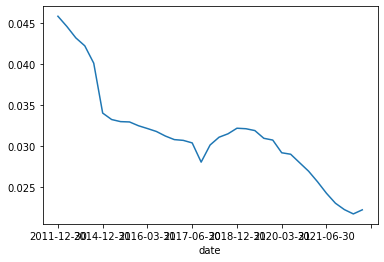

In [ ]:
import matplotlib.pyplot as plt
Adf = Adf.set_index("date")
Adf["avg cuppon"].plot()

In [ ]:
Adf.index = pd.to_datetime(Adf.index)

<AxesSubplot:xlabel='date'>

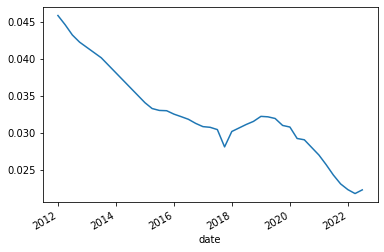

In [ ]:
Adf["avg cuppon"].plot()